# Simple Moving Average - Crossovers

This algorithm will use a simple moving average crossover to help the user decide when to buy and sell stocks. In this example, I will use a dataset that belongs to Petrobrás.

Petrobrás is a Brazilian multinational corporation in the petroleum industry and the company was ranked #120 in the most recent Fortune Global 500 list and in this exercise, I will show you a strategy using a Simple Moving Average Crossover.

This strategy is one of the most popular among traders in the whole world. It's simple and it has been helping traders to negotiate for a very long time. 

One of the biggest cons of this strategy is when the market gets sideways, it can give you the wrong buying or selling signs, but other than that, when the market is moving in one direction, such as up or down that can be a great choice to do your trading.

In this exercise, we used two Simple Moving Average one with 50 day period and another with 200 day period and we get a buying or selling sign whenever these SMA cross.

### - Importing Libraries

In [217]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### - Loading Data

In [218]:
petr4 = pd.read_csv('petr4_dataset.csv')

### - Showing the dataset

In [219]:
petr4

,TICKER,YYYY_MM_DD,OPEN,HIGH,LOW,CLOSE,VOL
0,PETR4.SA,20150102,9.99,9.99,9.36,9.36,48837200
1,PETR4.SA,20150106,8.71,8.83,8.04,8.33,84023400
2,PETR4.SA,20150107,8.56,8.73,8.36,8.67,85531000
3,PETR4.SA,20150108,8.79,9.39,8.74,9.18,82735700
4,PETR4.SA,20150112,9.27,9.58,8.79,8.91,57881600
...,...,...,...,...,...,...,...
780,PETR4.SA,20181129,24.96,25.50,24.88,25.17,65584300
781,PETR4.SA,20181130,25.11,25.56,25.07,25.46,90874500
782,PETR4.SA,20181203,26.30,26.53,25.80,25.94,90530000
783,PETR4.SA,20181204,26.25,26.33,25.34,25.34,66867500


### - Visualizing the data

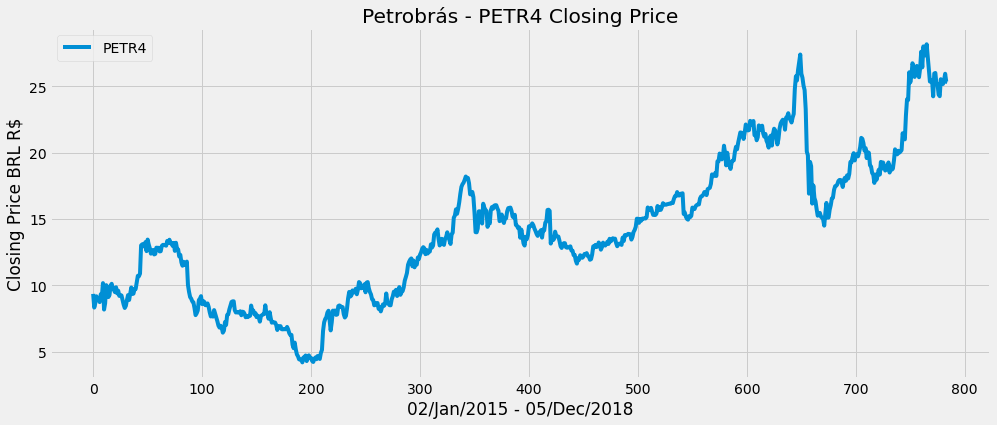

In [229]:
plt.figure(figsize=(15,6))
plt.plot(petr4['CLOSE'], label='PETR4')
plt.title('Petrobrás - PETR4 Closing Price')
plt.xlabel('02/Jan/2015 - 05/Dec/2018')
plt.ylabel('Closing Price BRL R$')
plt.legend()

### - Creating Simple Moving Average with 50 day period (we can adjust the pediod)

In [230]:
SMA50 = pd.DataFrame()
SMA50['CLOSE'] = petr4['CLOSE'].rolling(window = 50).mean()
SMA50

,CLOSE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
780,24.0414
781,24.1806
782,24.3204
783,24.4530


### - Creating Simple Moving Average with 200 day period (we can adjust the period)

In [231]:
SMA200 = pd.DataFrame()
SMA200['CLOSE'] = petr4['CLOSE'].rolling(window = 200).mean()
SMA200

,CLOSE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
780,21.00430
781,21.03640
782,21.06615
783,21.09565


### - Visualizing the data

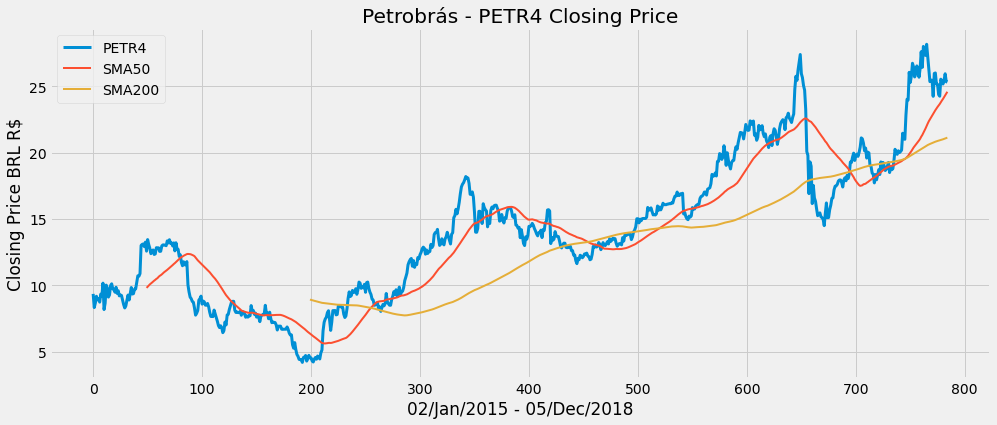

In [232]:
plt.figure(figsize=(15,6))
plt.plot(petr4['CLOSE'], label='PETR4', lw = 3)
plt.plot(SMA50['CLOSE'], label = 'SMA50', lw = 2)
plt.plot(SMA200['CLOSE'], label = 'SMA200', lw = 2)
plt.title('Petrobrás - PETR4 Closing Price')
plt.xlabel('02/Jan/2015 - 05/Dec/2018')
plt.ylabel('Closing Price BRL R$')
plt.legend()

### - Creating a new DataFrame

In [233]:
data = pd.DataFrame()
data['petr4'] = petr4['CLOSE']
data['SMA50'] = SMA50['CLOSE']
data['SMA200'] = SMA200['CLOSE']
data

,petr4,SMA50,SMA200
0,9.36,NaN,NaN
1,8.33,NaN,NaN
2,8.67,NaN,NaN
3,9.18,NaN,NaN
4,8.91,NaN,NaN
...,...,...,...
780,25.17,24.0414,21.00430
781,25.46,24.1806,21.03640
782,25.94,24.3204,21.06615
783,25.34,24.4530,21.09565


### - Creating a function to tell when to buy and sell

In [234]:
def buy_sell(data):
    buying_price = []
    selling_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA50'][i] > data['SMA200'][i]:
            if flag != 1:
                buying_price.append(data['petr4'][i])
                selling_price.append(np.nan)
                flag = 1
            else:
                buying_price.append(np.nan)
                selling_price.append(np.nan)
        elif data['SMA50'][i] < data['SMA200'][i]:
            if flag != 0:
                buying_price.append(np.nan)
                selling_price.append(data['petr4'][i])
                flag = 0
            else:
                buying_price.append(np.nan)
                selling_price.append(np.nan)
        else:
            buying_price.append(np.nan)
            selling_price.append(np.nan)
    return (buying_price, selling_price)

In [235]:
buy_sell = buy_sell(data)
data['Price_to_Buy'] = buy_sell[0]
data['Price_to_Sell'] = buy_sell[1]

In [236]:
data

,petr4,SMA50,SMA200,Price_to_Buy,Price_to_Sell
0,9.36,NaN,NaN,NaN,NaN
1,8.33,NaN,NaN,NaN,NaN
2,8.67,NaN,NaN,NaN,NaN
3,9.18,NaN,NaN,NaN,NaN
4,8.91,NaN,NaN,NaN,NaN
...,...,...,...,...,...
780,25.17,24.0414,21.00430,NaN,NaN
781,25.46,24.1806,21.03640,NaN,NaN
782,25.94,24.3204,21.06615,NaN,NaN
783,25.34,24.4530,21.09565,NaN,NaN


### - Visualizing the data and the SMA Crossover Strategy

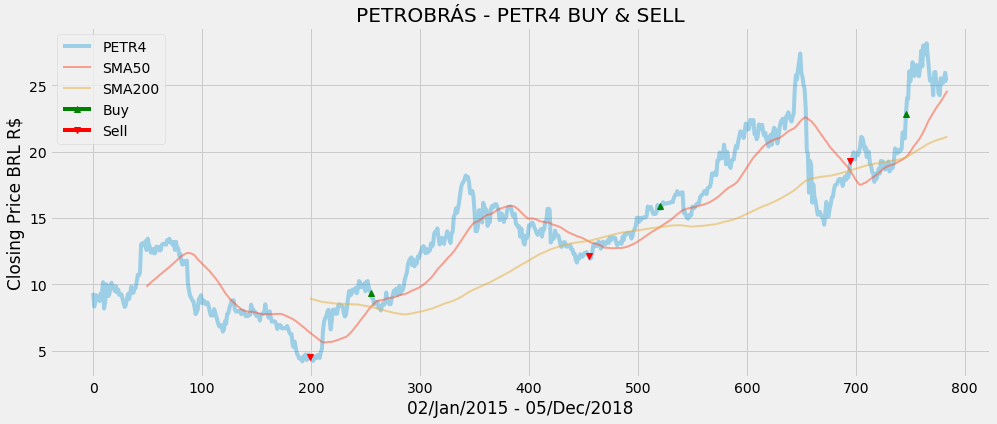

In [237]:
plt.figure(figsize = (15, 6))
plt.plot(data['petr4'], label = 'PETR4', alpha = 0.35)
plt.plot(data['SMA50'], label = 'SMA50', alpha = 0.50, lw = 2)
plt.plot(data['SMA200'], label = 'SMA200', alpha = 0.50, lw = 2)
plt.plot(data.index, data['Price_to_Buy'], label = 'Buy', marker = '^', color = 'green')
plt.plot(data.index, data['Price_to_Sell'], label = 'Sell', marker = 'v', color = 'red')
plt.title('PETROBRÁS - PETR4 BUY & SELL')
plt.xlabel('02/Jan/2015 - 05/Dec/2018')
plt.ylabel('Closing Price BRL R$')
plt.legend()